<a href="https://colab.research.google.com/github/coding-dojo-data-science/Example-Project-Analyzing-Ames-Housing/blob/main/Example_Ames_CRISP_DM_Project_Notebook_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing House Prices in Ames Iowa
Part 1: Business Understanding and Data Understanding (pre-EDA)

- Student Name: Example Project

# Introduction

<center><img src="https://raw.githubusercontent.com/coding-dojo-data-science/Example-Project-Analyzing-Ames-Housing/main/Images/house-image.png" width=800px>

<a href="https://dolinskigroup.com/buy-home/sellers-concessions">Image Source</a></center>

We've been hired by a group of homeowners who are concerned about the value of their homes decreasing before they sell them. They have asked us to take the raw house price data from their hometown, Ames, Iowa to be able to give them data-driven recommendations on how to best increase the value of their home.


We will be following the CRISP-DM workflow for our analysis.  

<center>
<img src="https://lh4.googleusercontent.com/XTLCxAnBAFkfjmtM0twmmqvvRLNFaxKdQlfyQXLn8RCQYiEhzSztw_xH68HcxB6MAnXyzZ-2Zz9gDHFQn2sfuwZJoSGxAurKHOfkmIYbrrXYjXGr1oXxpe_QY-cn7Fz3fJ-sIfXKaM7U1EAuCdq1FFo" width=600px>


<a href="https://www.datascience-pm.com/crisp-dm-2">Image Source</a></center>



## Table of Contents

- [Phase 1) Business Understanding](#phase1)
- [Phase 2) Data Understanding](#phase2)



<a name='phase1'></a>
# Phase 1) Business Understanding



**Our stakeholders are:**
- People who already own homes in Ames, Iowa

**Their primary goal is:**
- Increase the resale value of their homes.

**They plan to:**
- Modify/renovate their homes based on our analysis.

**What do they need/expect?**
- Actionable insights/recommendations for which modifications they can make to increase the price of their homes.


<a name='phase2'></a>
# Phase 2) Data Understanding



## 2.1) What data have we been provided?





<p>The stakeholders have provided us with two links:</p>
<ul><li> <a href="https://drive.google.com/file/d/1Jach7HsZVywhJnUJmkyqje52ho_0VJgo/view?usp=sharing" target="_blank">Share URL to a .csv file</a> <ul><li>A spreadsheet of various features of homes in their town, as well as the price of the house at the time of sale. </li></ul></li><li><a href="https://docs.google.com/document/d/1nmnel7g35aMOl0mKiSsTHXT8wRzbJ1EktKNqYFEmpWE/edit?usp=sharing" target="_blank">A Data Dictionary File</a><ul><li>A data dictionary is a document that lists the name and explanation for every feature in a dataset.</li></ul></li></ul>
<p>(Note, this is a modified version of the original Ames Iowa Housing dataset found on <a href="https://www.kaggle.com/datasets/marcopale/housing" target="_blank">Kaggle</a>)</p>


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

import missingno as msno
## Setting the max_columns to 50
pd.set_option('display.max_columns',50)

In [3]:
from sklearn import set_config
set_config(transform_output='pandas')

In [4]:
# Load in the data
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/ames-housing-dojo.csv"
df = pd.read_csv(fpath)
# Preview first 5 rows
df.head()

,Unnamed: 0,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,Bsmt Unf SF,Total Bsmt SF,Central Air,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,TotRms AbvGrd,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
0,0,907227090,RL,60,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864sqft,0.0,0.0,1,0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,03-2006,119900.0
1,1,527108010,RL,134,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462sqft,1.0,0.0,2,1,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,03-2006,320000.0
2,2,534275170,RL,-1,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958sqft,0.0,0.0,1,0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,04-2007,151500.0
3,3,528104050,RL,114,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084sqft,1.0,0.0,2,0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,06-2008,385000.0
4,4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565sqft,1.0,0.0,2,0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,02-2007,193800.0



## **2.2) What information is included in the data?**


Overview:
- How many records (rows)?
- How many features (columns)?
- What is each feature's format/data type (string/integer/etc.)?
- What is the meaning of each feature (how does it relate to the stakeholder’s goals?)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2959 non-null   int64  
 1   PID             2959 non-null   int64  
 2   MS Zoning       2959 non-null   object 
 3   Lot Frontage    2959 non-null   int64  
 4   Lot Area        2959 non-null   int64  
 5   Street          2959 non-null   object 
 6   Alley           201 non-null    object 
 7   Utilities       2959 non-null   object 
 8   Neighborhood    2959 non-null   object 
 9   Bldg Type       2959 non-null   object 
 10  House Style     2959 non-null   object 
 11  Overall Qual    2959 non-null   int64  
 12  Overall Cond    2959 non-null   int64  
 13  Year Built      2959 non-null   int64  
 14  Year Remod/Add  2959 non-null   int64  
 15  Exter Qual      2959 non-null   object 
 16  Exter Cond      2959 non-null   object 
 17  Bsmt Unf SF     2958 non-null   f



- The file had 2,959 rows and 38 columns.
- There is a mixture of datatypes:
  - 8 float
  - 12 float
  - 18 object

  
- Since numeric features are sometimes stored as object dtype, we will inspect the object columns next and look for columns that should be converted.

### Inspecting Object Columns for Numeric Features 

In [6]:
# Preview all object columns
df.select_dtypes("object").head()

,MS Zoning,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Exter Qual,Exter Cond,Central Air,Gr Liv Area,Half Bath,Garage Type,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold
0,RL,Pave,NaN,AllPub,CollgCr,1Fam,1Story,TA,TA,Y,864sqft,0,Detchd,TA,TA,Y,MnPrv,03-2006
1,RL,Pave,NaN,AllPub,Gilbert,1Fam,2Story,Gd,TA,Y,2462sqft,1,Attchd,TA,TA,Y,NaN,03-2006
2,RL,Pave,NaN,AllPub,NAmes,1Fam,1Story,TA,Gd,Y,958sqft,0,Attchd,TA,TA,Y,NaN,04-2007
3,RL,Pave,NaN,AllPub,NridgHt,1Fam,1Story,Ex,TA,Y,2084sqft,0,Attchd,TA,TA,Y,NaN,06-2008
4,FV,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,Gd,TA,Y,1565sqft,0,Attchd,TA,TA,Y,NaN,02-2007


- **Object columns that should be converted to numeric:**
  - [ ] Half Bath
  - [ ] Living Area Sqft (after removing"sqft" from each row)

### Converting Object Columns to Numeric

#### Half Bath

In [7]:
try:
  df["Half Bath"] = df['Half Bath'].astype(float)
except Exception as e:
  display(e)

ValueError("could not convert string to float: '?'")

- There is a "?" that cannot be converted to float, which we will replace with a NaN.

In [8]:
# Replace the "?" with a null value and convert to float
df['Half Bath'] = df['Half Bath'].replace("?",np.nan)
df["Half Bath"] = df['Half Bath'].astype(float)

#### Gr Living Area

In [9]:
## Removing the units (sqft) before and convert to float
df['Gr Liv Area'] = df['Gr Liv Area'].str.replace("sqft",'')
df['Gr Liv Area'] = df['Gr Liv Area'].astype(float)

In [10]:
# Confirm no additional object cols to convert
df.select_dtypes('object').head()

,MS Zoning,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Exter Qual,Exter Cond,Central Air,Garage Type,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold
0,RL,Pave,NaN,AllPub,CollgCr,1Fam,1Story,TA,TA,Y,Detchd,TA,TA,Y,MnPrv,03-2006
1,RL,Pave,NaN,AllPub,Gilbert,1Fam,2Story,Gd,TA,Y,Attchd,TA,TA,Y,NaN,03-2006
2,RL,Pave,NaN,AllPub,NAmes,1Fam,1Story,TA,Gd,Y,Attchd,TA,TA,Y,NaN,04-2007
3,RL,Pave,NaN,AllPub,NridgHt,1Fam,1Story,Ex,TA,Y,Attchd,TA,TA,Y,NaN,06-2008
4,FV,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,Gd,TA,Y,Attchd,TA,TA,Y,NaN,02-2007


### **What is the meaning of each feature?**


Please see the <a href="https://docs.google.com/document/d/1nmnel7g35aMOl0mKiSsTHXT8wRzbJ1EktKNqYFEmpWE/edit?usp=sharing" target="_blank">Data Dictionary File</a> for full details.



**After consulting the data dictionary, we noticed there are 2 features not included in the data dictionary:**
- [ ] **"Unnamed: 0"**: There is an erroneous index column that is not in the data dictionary, and should be dropped.



- [ ] **"PID"** column that is not included in the data dictionary.
  - Based on the preview above it looks like it may be a unique identifier, and can be either dropped or used as the index after checking for duplicates.


**There were several features with ambiguous column names.**
The following will be renamed for clarity:
  - "Year Remod/Add" -> "Year Remodeled"
  - "Bsmt Unf SF" -> "Bsmt Unf Sqft"
  - "Total Bsmt SF" -> "Total Bsmnt Sqft"
  - "TotRms AbvGrd" -> "Total Rooms"
  - "Gr Liv Area" -> "Living Area Sqft"



In [11]:
# Dropping index column
df = df.drop(columns=['Unnamed: 0'])
df

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,Bsmt Unf SF,Total Bsmt SF,Central Air,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,TotRms AbvGrd,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
0,907227090,RL,60,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,0.0,0.0,1,0.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,03-2006,119900.0
1,527108010,RL,134,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,1.0,0.0,2,1.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,03-2006,320000.0
2,534275170,RL,-1,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,0.0,0.0,1,0.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,04-2007,151500.0
3,528104050,RL,114,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,1.0,0.0,2,0.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,06-2008,385000.0
4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,1.0,0.0,2,0.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,02-2007,193800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,903400030,RL,50,11672,Pave,Pave,AllPub,BrkSide,1Fam,1Story,5,5,1925,1950,TA,TA,816.0,816.0,Y,816.0,0.0,0.0,1,0.0,2,1,4,Detchd,1925.0,1.0,210.0,Fa,Fa,N,NaN,07-2006,109000.0
2955,533234020,FV,79,10646,Pave,NaN,AllPub,Somerst,1Fam,2Story,7,5,2001,2001,TA,TA,177.0,858.0,Y,1789.0,1.0,0.0,2,1.0,3,1,7,Attchd,2001.0,2.0,546.0,TA,TA,Y,NaN,06-2008,223000.0
2956,908188140,RM,24,2522,Pave,NaN,AllPub,Edwards,Twnhs,2Story,7,5,2004,2004,Gd,TA,970.0,970.0,Y,1709.0,0.0,0.0,2,0.0,3,1,7,Detchd,2004.0,2.0,380.0,TA,TA,Y,NaN,04-2006,137500.0
2957,909254050,RL,54,7609,Pave,NaN,AllPub,Crawfor,1Fam,2Story,8,9,1925,1997,Gd,Gd,392.0,798.0,Y,1512.0,1.0,0.0,2,0.0,3,1,7,Detchd,1925.0,1.0,180.0,TA,TA,P,GdPrv,06-2008,231000.0


In [12]:
## Rename features with more intuitive names
rename_dict = {"Year Remod/Add":"Year Remodeled",
               "Bsmt Unf SF": "Bsmt Unf Sqft",
               "Total Bsmt SF": "Total Bsmnt Sqft",
               "TotRms AbvGrd": "Total Rooms",
               "Gr Liv Area":"Living Area Sqft"}

df = df.rename(rename_dict,axis=1)
df.head()

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
0,907227090,RL,60,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,0.0,0.0,1,0.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,03-2006,119900.0
1,527108010,RL,134,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,1.0,0.0,2,1.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,03-2006,320000.0
2,534275170,RL,-1,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,0.0,0.0,1,0.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,04-2007,151500.0
3,528104050,RL,114,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,1.0,0.0,2,0.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,06-2008,385000.0
4,533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,1.0,0.0,2,0.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,02-2007,193800.0


In [13]:
# Code for creating markdown table for readme
rename_table = pd.DataFrame({'Original Column': rename_dict.keys(),
                             "Renamed Column": rename_dict.values()})
rename_table.to_markdown(index=False)

'| Original Column   | Renamed Column   |\n|:------------------|:-----------------|\n| Year Remod/Add    | Year Remodeled   |\n| Bsmt Unf SF       | Bsmt Unf Sqft    |\n| Total Bsmt SF     | Total Bsmnt Sqft |\n| TotRms AbvGrd     | Total Rooms      |\n| Gr Liv Area       | Living Area Sqft |'


## **2.3) How clean is the data?**



### Are there duplicate rows?


In [14]:
# Include the first row along with all dupicates
duplicated_rows = df.duplicated()
duplicated_rows.sum()

7



- [ ] There were 7 duplicate rows that we will drop.


In [15]:
# # Display duplicates 
# df[duplicated_rows].sort_values("PID")

In [16]:
## Drop duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

- Checking for duplicate PID's. 



Because we have already removed rows that were identical for every feature, we know that there will be differences between the features for any rows with duplicate PIDs.

Therefore, we will specify keep=False in df.duplicated() so we can see compare the rows that share a PID.


In [17]:
## Check unique id col for duplicates'
duplicated_pids = df.duplicated(subset=['PID'], keep=False)
duplicated_pids.sum()

44

- There are 22 rows with duplicate PID's (44 total). 

- To find which duplicate rows to drop, we will filter for the duplicate and sort by PID to align the rows by PID, so we can compare the values in each feature.

In [18]:
# Visualizing duplicates
df[duplicated_pids].sort_values("PID")

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
2654,526355080,RL,75,13860,Pave,NaN,AllPub,NAmes,1Fam,SLvl,8,7,1972,1995,Gd,TA,542.0,1952.0,Y,2704.0,1.0,0.0,2,1.0,4,1,9,Attchd,1972.0,2.0,538.0,TA,TA,Y,MnPrv,07-2009,NaN
1650,526355080,RL,75,13860,Pave,NaN,AllPub,NAmes,1Fam,SLvl,8,7,1972,1995,Gd,TA,542.0,1952.0,Y,2704.0,1.0,0.0,2,1.0,4,1,9,Attchd,1972.0,2.0,538.0,TA,TA,Y,MnPrv,07-2009,345000.0
135,527110020,RL,-1,8530,Pave,NaN,AllPub,Gilbert,1Fam,SLvl,7,5,1995,1996,TA,TA,384.0,384.0,Y,1474.0,0.0,0.0,2,1.0,3,1,7,BuiltIn,1995.0,2.0,400.0,TA,TA,Y,NaN,05-2009,168500.0
2469,527110020,RL,-1,8530,Pave,NaN,AllPub,Gilbert,1Fam,SLvl,7,5,1995,1996,TA,TA,384.0,384.0,Y,1474.0,0.0,0.0,2,1.0,3,1,7,BuiltIn,1995.0,2.0,400.0,TA,TA,Y,NaN,05-2009,NaN
626,527326040,RL,85,11900,Pave,NaN,AllPub,NWAmes,1Fam,1Story,7,5,1977,1977,TA,Gd,564.0,1386.0,Y,1411.0,0.0,0.0,2,0.0,3,1,6,Attchd,1977.0,2.0,544.0,TA,TA,Y,NaN,04-2009,82500.0
625,527326040,RL,85,11900,Pave,NaN,AllPub,NWAmes,1Fam,1Story,7,5,1977,1977,TA,Gd,564.0,1386.0,Y,1411.0,0.0,0.0,2,0.0,3,1,6,Attchd,1977.0,2.0,544.0,TA,TA,Y,NaN,04-2009,NaN
2341,528178070,RL,130,16900,Pave,NaN,AllPub,NridgHt,1Fam,2Story,8,5,2001,2002,Gd,TA,404.0,1479.0,Y,2649.0,1.0,0.0,2,1.0,4,1,10,Attchd,2001.0,3.0,746.0,TA,TA,Y,NaN,01-2008,421250.0
929,528178070,RL,130,16900,Pave,NaN,AllPub,NridgHt,1Fam,2Story,8,5,2001,2002,Gd,TA,404.0,1479.0,Y,2649.0,1.0,0.0,2,1.0,4,1,10,Attchd,2001.0,3.0,746.0,TA,TA,Y,NaN,01-2008,NaN
2599,528429100,RL,49,15218,Pave,NaN,AllPub,Somerst,1Fam,1Story,8,5,2006,2006,Gd,TA,108.0,1670.0,Y,1670.0,1.0,0.0,2,1.0,2,1,6,Attchd,2006.0,3.0,928.0,TA,TA,Y,NaN,09-2006,336820.0
324,528429100,RL,49,15218,Pave,NaN,AllPub,Somerst,1Fam,1Story,8,5,2006,2006,Gd,TA,108.0,1670.0,Y,1670.0,1.0,0.0,2,1.0,2,1,6,Attchd,2006.0,3.0,928.0,TA,TA,Y,NaN,09-2006,NaN


- In the 44 rows with duplicate PID rows, each duplicate had a duplicate PID that had a NaN for SalePrice.
  - A) We cannot have null values in SalePrice since it is our target, so we will drop null values from SalePrice only.
  - B) Also, by dropping the rows with null SalePrice, we may also remove the duplicate PID's.
  
- So we first drop null values from SalePrice and then check if there are still remiaining duplicate PID's.

In [19]:
# checking # of null values in SalePrice
df['SalePrice'].isna().sum()

22

In [20]:
# Dropping Null values from SalePrice
df = df.dropna(subset=["SalePrice"])
df['SalePrice'].isna().sum()

0

In [21]:
# Confirming  no more duplicated PIDs
df.duplicated(subset=['PID'], keep=False).sum()

0

- We have successfully removed rows with duplicate PID's while remoing null values for SalePrice.

#### Confirming PID is unique (to make it the index)

While we could drop PID and use the original integer index for the DataFrame, it would be better to use a true unique identifier that came from the original data source. 


In [22]:
# Checking if PID is 100% unique
df['PID'].nunique()/len(df) * 100

100.0

In [23]:
# Making PID the index
df = df.set_index("PID")
df

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,0.0,0.0,1,0.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,03-2006,119900.0
527108010,RL,134,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,1.0,0.0,2,1.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,03-2006,320000.0
534275170,RL,-1,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,0.0,0.0,1,0.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,04-2007,151500.0
528104050,RL,114,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,1.0,0.0,2,0.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,06-2008,385000.0
533206070,FV,32,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,1.0,0.0,2,0.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,02-2007,193800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903400030,RL,50,11672,Pave,Pave,AllPub,BrkSide,1Fam,1Story,5,5,1925,1950,TA,TA,816.0,816.0,Y,816.0,0.0,0.0,1,0.0,2,1,4,Detchd,1925.0,1.0,210.0,Fa,Fa,N,NaN,07-2006,109000.0
533234020,FV,79,10646,Pave,NaN,AllPub,Somerst,1Fam,2Story,7,5,2001,2001,TA,TA,177.0,858.0,Y,1789.0,1.0,0.0,2,1.0,3,1,7,Attchd,2001.0,2.0,546.0,TA,TA,Y,NaN,06-2008,223000.0
908188140,RM,24,2522,Pave,NaN,AllPub,Edwards,Twnhs,2Story,7,5,2004,2004,Gd,TA,970.0,970.0,Y,1709.0,0.0,0.0,2,0.0,3,1,7,Detchd,2004.0,2.0,380.0,TA,TA,Y,NaN,04-2006,137500.0



### Are there missing values?



In [24]:
## Check for Null values
null_counts = df.isna().sum()
null_counts

MS Zoning              0
Lot Frontage           0
Lot Area               0
Street                 0
Alley               2732
Utilities              0
Neighborhood           0
Bldg Type              0
House Style            0
Overall Qual           0
Overall Cond           0
Year Built             0
Year Remodeled         0
Exter Qual             0
Exter Cond             0
Bsmt Unf Sqft          1
Total Bsmnt Sqft       1
Central Air            0
Living Area Sqft       0
Bsmt Full Bath         2
Bsmt Half Bath         2
Full Bath              0
Half Bath              3
Bedroom                0
Kitchen                0
Total Rooms            0
Garage Type          157
Garage Yr Blt        159
Garage Cars            1
Garage Area            1
Garage Qual          159
Garage Cond          159
Paved Drive            0
Fence               2358
Date Sold              0
SalePrice              0
dtype: int64

In [25]:
# Getting nulls as percent of total vallues
null_percent = null_counts/len(df) * 100
null_percent

MS Zoning            0.000000
Lot Frontage         0.000000
Lot Area             0.000000
Street               0.000000
Alley               93.242321
Utilities            0.000000
Neighborhood         0.000000
Bldg Type            0.000000
House Style          0.000000
Overall Qual         0.000000
Overall Cond         0.000000
Year Built           0.000000
Year Remodeled       0.000000
Exter Qual           0.000000
Exter Cond           0.000000
Bsmt Unf Sqft        0.034130
Total Bsmnt Sqft     0.034130
Central Air          0.000000
Living Area Sqft     0.000000
Bsmt Full Bath       0.068259
Bsmt Half Bath       0.068259
Full Bath            0.000000
Half Bath            0.102389
Bedroom              0.000000
Kitchen              0.000000
Total Rooms          0.000000
Garage Type          5.358362
Garage Yr Blt        5.426621
Garage Cars          0.034130
Garage Area          0.034130
Garage Qual          5.426621
Garage Cond          5.426621
Paved Drive          0.000000
Fence     

In [26]:
## Combining null_counts and null_percent above
null_report = pd.DataFrame({'# Null':null_counts,
                            '% Null':null_percent}).round(2)
null_report

,# Null,% Null
MS Zoning,0,0.00
Lot Frontage,0,0.00
Lot Area,0,0.00
Street,0,0.00
Alley,2732,93.24
Utilities,0,0.00
Neighborhood,0,0.00
Bldg Type,0,0.00
House Style,0,0.00
Overall Qual,0,0.00


<Axes: >

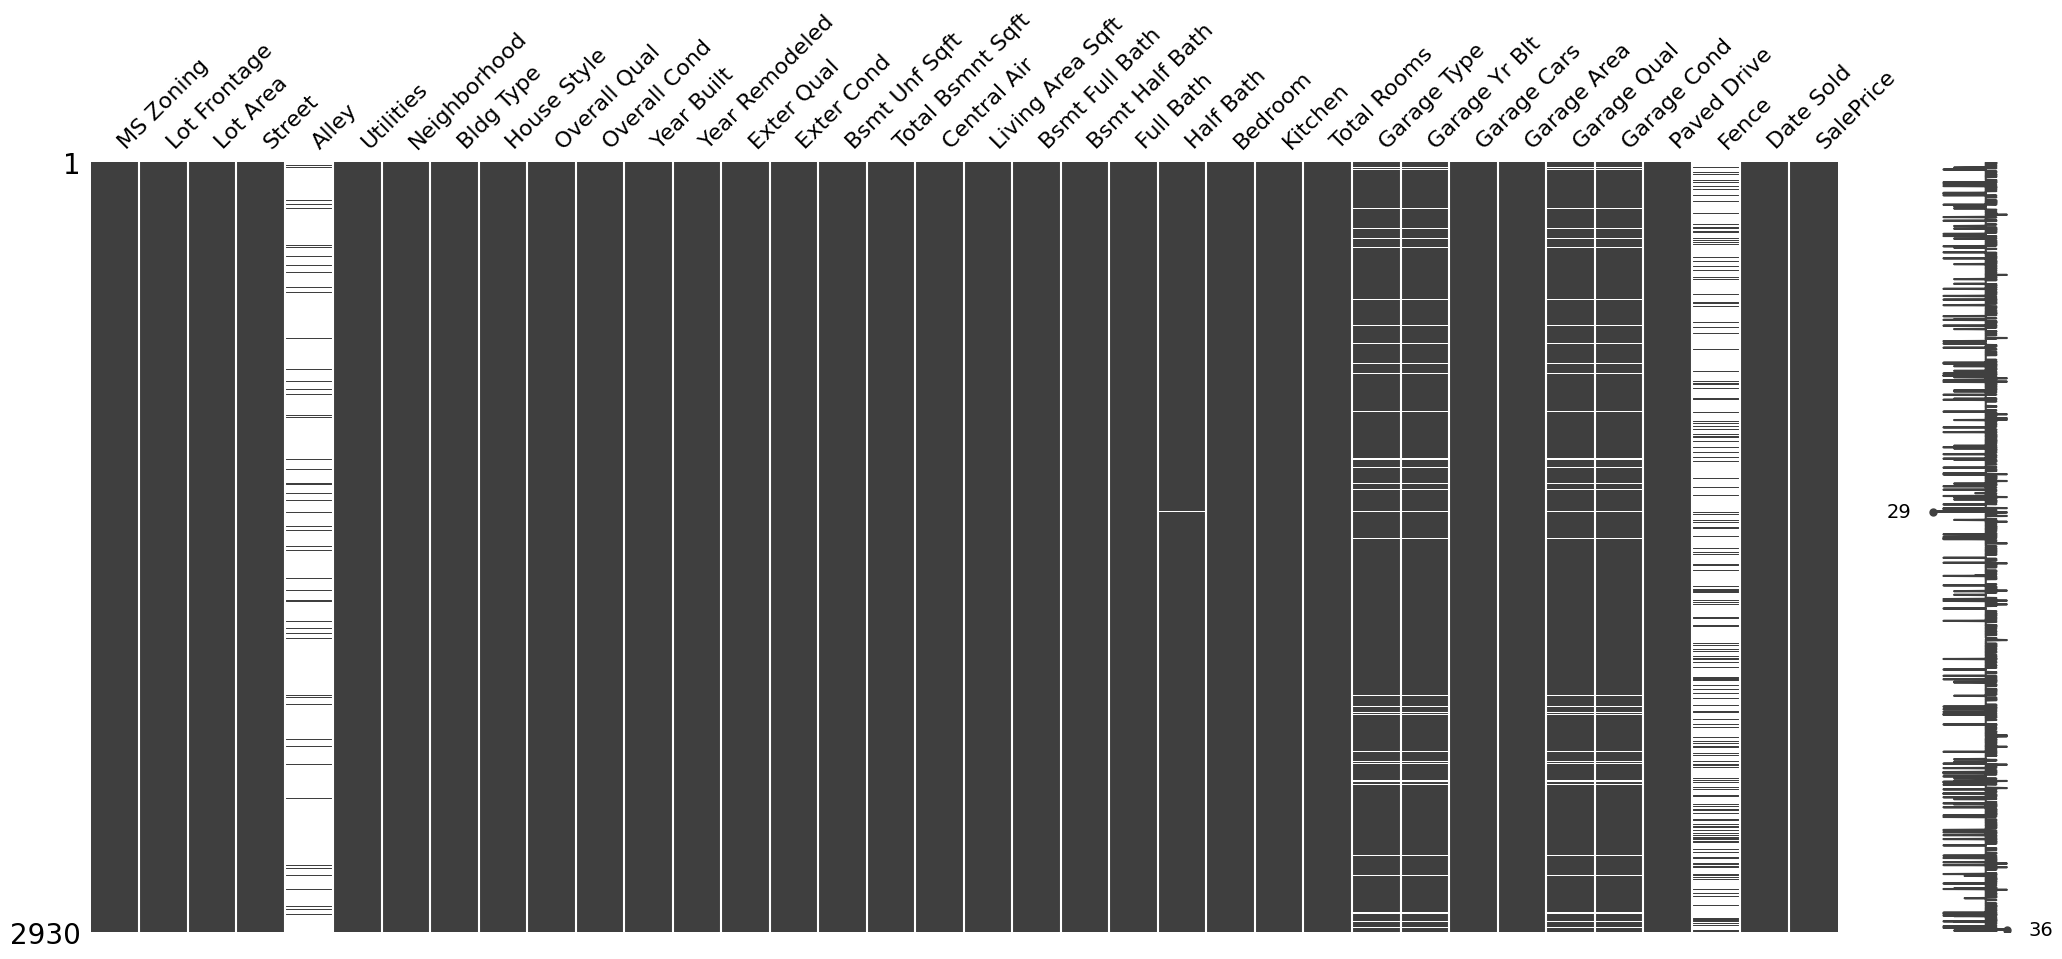

In [27]:
# Visualizing Missing Values with missingno
msno.matrix(df)

- In the missingno matrix plot, we can see that there are only a few columns that have missing values. Of these columns, 2 seem to have primarily null values ("Alley" and "Fence"). 

- Below, we will display the null value counts and percentages for only the column with null values:

In [28]:
## filtering for only columns with null values
null_report[ null_report['# Null']>0]

,# Null,% Null
Alley,2732,93.24
Bsmt Unf Sqft,1,0.03
Total Bsmnt Sqft,1,0.03
Bsmt Full Bath,2,0.07
Bsmt Half Bath,2,0.07
Half Bath,3,0.10
Garage Type,157,5.36
Garage Yr Blt,159,5.43
Garage Cars,1,0.03
Garage Area,1,0.03


#### Null Value Observations:
- Alley and Fence have a large percentage of null values (93% and 80%, respectively).
- For Garage Columns (Garage Type, Garage Yr Built, Garage Qual, Garage Cond), the same rows are null values for all of these columns.
  - This likely indicates that these homes did not have a Garage.



### Are there any features with inconsistent values?


#### Checking Categorical Features for Inconsistencies

In [29]:
# Identify string columns
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['MS Zoning', 'Street', 'Alley', 'Utilities', 'Neighborhood',
       'Bldg Type', 'House Style', 'Exter Qual', 'Exter Cond', 'Central Air',
       'Garage Type', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Fence',
       'Date Sold'],
      dtype='object')

In [30]:
# Obtain the value counts for all string columns
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts(dropna=False))
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64


Value Counts for Street
Pave    2918
Grvl      12
Name: Street, dtype: int64


Value Counts for Alley
NaN     2732
Grvl     120
Pave      78
Name: Alley, dtype: int64


Value Counts for Utilities
AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64


Value Counts for Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64


Value Counts for Bldg Type
1Fam      2425
TwnhsE     233
Duplex     109

##### Notes on Categorical Feature Inconsistencies

- **Central Air**: 
  - There were a small number of values in the Central Air column that had "yes" instead of "Y" and "no" instead of "N."
  - [ ] We will replace the incorrect values with "Y" and "N."

- **Date Sold**: 
  - Is not inconsistent, but would be better used separate month and year features.
  - We will separate into 2 features after checking remaining columns for inconsistencies.
  


##### Fixing "Central Air" inconsistencies

In [31]:
# deal with inconsistent values
df['Central Air'] = df['Central Air'].replace({'yes':"Y",'no':'N'})
df['Central Air'].value_counts(dropna=False)

Y    2734
N     196
Name: Central Air, dtype: int64

#### Checking Numeric Features for Consistency

In [32]:
df.describe().round(2)

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remodeled,Bsmt Unf Sqft,Total Bsmnt Sqft,Living Area Sqft,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
count,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2929.00,2929.00,2930.00,2928.00,2928.00,2930.00,2927.00,2930.00,2930.00,2930.00,2771.00,2929.00,2929.00,2930.00
mean,57.48,10147.92,6.09,5.56,1971.36,1984.27,559.26,1051.61,1499.69,0.43,0.06,1.57,0.38,2.85,1.04,6.44,1978.13,1.77,472.82,181439.40
std,33.79,7880.02,1.41,1.11,30.25,20.86,439.49,440.62,505.51,0.52,0.25,0.55,0.50,0.83,0.21,1.57,25.53,0.76,215.05,86659.68
min,-1.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1895.00,0.00,0.00,12789.00
25%,43.00,7440.25,5.00,5.00,1954.00,1965.00,219.00,793.00,1126.00,0.00,0.00,1.00,0.00,2.00,1.00,5.00,1960.00,1.00,320.00,129500.00
50%,63.00,9436.50,6.00,5.00,1973.00,1993.00,466.00,990.00,1442.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1979.00,2.00,480.00,160000.00
75%,78.00,11555.25,7.00,6.00,2001.00,2004.00,802.00,1302.00,1742.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,2002.00,2.00,576.00,213500.00
max,313.00,215245.00,10.00,9.00,2010.00,2010.00,2336.00,6110.00,5642.00,3.00,2.00,4.00,2.00,8.00,3.00,15.00,2207.00,5.00,1488.00,2000000.00


##### **Notes on Numeric Feature Inconsistencies**

- **Lot Frontage**: has a minimum value of -1. 
  - This may be a placeholder value.
  - [ ] We should consider replace the -1's with either NaN or 0, which we will decide after visualizing the features.

- **SalePrice**: The max value is much higher than the 75 percentile (\$2 million vs. \$213,500). 
  - [ ] We should inspect this home and confirm it is reasonable.


- **Garage Yr Built**: has a max value of 2207, which is in many years into the future, and cannot be correct.
  - [ ] Replace with a null value

##### Addressing Lot Frontage Inconsistencies

In [33]:
## How many rows with Lot Frontage -1's 
filter_neg_lot_frontage = df['Lot Frontage'] < 0
filter_neg_lot_frontage.sum()

490

In [34]:
##  Replacing negative lot frontages with null values
df.loc[filter_neg_lot_frontage,'Lot Frontage'] = np.nan

## Confirming no longer rows with Lot Frontage < 0 
filter_neg_lot_frontage = df['Lot Frontage'] < 0
filter_neg_lot_frontage.sum()

0

#####  Addressing Sale Price Inconsistencies

In [35]:
# Visualze expensive home (SalePrice >= 2 million)
filter_high_price = df['SalePrice'] >= 2_000_000
df[filter_high_price]

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
902201120,RM,50.0,6000,Pave,NaN,AllPub,OldTown,1Fam,1Story,5,5,1948,1950,TA,TA,516.0,789.0,Y,789.0,0.0,0.0,1,0.0,2,1,5,Detchd,1948.0,1.0,250.0,TA,TA,Y,NaN,04-2008,2000000.0


In [36]:
## Checking 5 highest prices to compare against outlier $2 million
df.sort_values("SalePrice", ascending=False).head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
902201120,RM,50.0,6000,Pave,NaN,AllPub,OldTown,1Fam,1Story,5,5,1948,1950,TA,TA,516.0,789.0,Y,789.0,0.0,0.0,1,0.0,2,1,5,Detchd,1948.0,1.0,250.0,TA,TA,Y,NaN,04-2008,2000000.0
528351010,RL,104.0,21535,Pave,NaN,AllPub,NoRidge,1Fam,2Story,10,6,1994,1995,Ex,TA,989.0,2444.0,Y,4316.0,0.0,1.0,3,1.0,4,1,10,Attchd,1994.0,3.0,832.0,TA,TA,Y,NaN,01-2007,755000.0
528320050,RL,160.0,15623,Pave,NaN,AllPub,NoRidge,1Fam,2Story,10,5,1996,1996,Gd,TA,300.0,2396.0,Y,4476.0,1.0,0.0,3,1.0,4,1,10,Attchd,1996.0,3.0,813.0,TA,TA,Y,MnPrv,07-2007,745000.0
528320060,RL,118.0,35760,Pave,NaN,AllPub,NoRidge,1Fam,2Story,10,5,1995,1996,Gd,Gd,543.0,1930.0,Y,3627.0,1.0,0.0,3,1.0,4,1,10,Attchd,1995.0,3.0,807.0,TA,TA,Y,NaN,07-2006,625000.0
528164060,RL,106.0,12720,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2003,2003,Ex,TA,278.0,2535.0,Y,2470.0,2.0,0.0,1,1.0,1,1,7,Attchd,2003.0,3.0,789.0,TA,TA,Y,NaN,02-2008,615000.0


- The Living Area Sqft for the \$2mill home is very small compared to the other most-expensive homes. 
789 sqft vs. 2,400 sqft (with a price of \$755,000).

- This value is not realistic, and should either be dropped or replaced with \$200,000. the \$2 million could be a typo with an extra 0.




In [37]:
df.loc[filter_high_price,'SalePrice'] = 200_000
df['SalePrice'].describe()

count      2930.000000
mean     180825.070307
std       79878.223965
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

##### Addressing Garage Yr Blt Inconsistencies

In [38]:
## Filter for row with Garage Yr Blt = 2207
filter_typo_garage_year = df['Garage Yr Blt'] == 2207
filter_typo_garage_year

PID
907227090    False
527108010    False
534275170    False
528104050    False
533206070    False
             ...  
903400030    False
533234020    False
908188140    False
909254050    False
902201120    False
Name: Garage Yr Blt, Length: 2930, dtype: bool

In [39]:
df.loc[filter_typo_garage_year,'Garage Yr Blt'] = np.nan
df['Garage Yr Blt'].describe()

count    2770.000000
mean     1978.049819
std        25.159722
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64


### Do any features need to be combined or separated?



- [ ] There is a Date Sold column that we will split into 2: Month and Year


#### Splitting "Date Sold" into "Month" and "Year"

In [40]:
## Split Date Sold in Month and Year
df[['Month','Year']] = df.loc[:,'Date Sold'].str.split('-', expand=True)
df.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Date Sold,SalePrice,Month,Year
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60.0,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,0.0,0.0,1,0.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,03-2006,119900.0,03,2006
527108010,RL,134.0,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,1.0,0.0,2,1.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,03-2006,320000.0,03,2006
534275170,RL,NaN,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,0.0,0.0,1,0.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,04-2007,151500.0,04,2007
528104050,RL,114.0,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,1.0,0.0,2,0.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,06-2008,385000.0,06,2008
533206070,FV,32.0,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,1.0,0.0,2,0.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,02-2007,193800.0,02,2007


In [41]:
# Dropping original date sold column
df = df.drop(columns=['Date Sold'])

#### Add "Bsmt Half Baths" + "Half Baths" to make "Total Half Baths"

In [42]:
# Preview first 5 values
df['Full Bath'].head()

PID
907227090    1
527108010    2
534275170    1
528104050    2
533206070    2
Name: Full Bath, dtype: int64

In [43]:
# Preview first 5 values
df['Bsmt Full Bath'].head()

PID
907227090    0.0
527108010    1.0
534275170    0.0
528104050    1.0
533206070    1.0
Name: Bsmt Full Bath, dtype: float64

In [44]:
# Add values from two columns to create a new column
df['Total Full Baths'] = df['Full Bath'] + df['Bsmt Full Bath']
df['Total Full Baths'].head()

PID
907227090    1.0
527108010    3.0
534275170    1.0
528104050    3.0
533206070    3.0
Name: Total Full Baths, dtype: float64

In [45]:
# Drop the original columns
df = df.drop(columns=['Full Bath', 'Bsmt Full Bath'])
df.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bsmt Half Bath,Half Bath,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60.0,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,0.0,0.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,03,2006,1.0
527108010,RL,134.0,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,0.0,1.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,320000.0,03,2006,3.0
534275170,RL,NaN,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,0.0,0.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,151500.0,04,2007,1.0
528104050,RL,114.0,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,0.0,0.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,385000.0,06,2008,3.0
533206070,FV,32.0,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,0.0,0.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,193800.0,02,2007,3.0


#### Combine "Bsmt Half Baths" + "Half Baths"

In [46]:
# Inspect first 5 rows
df['Half Bath'].value_counts(dropna=False)

0.0    1841
1.0    1061
2.0      25
NaN       3
Name: Half Bath, dtype: int64

In [47]:
# Inspect first 5 rows
df['Bsmt Half Bath'].value_counts()

0.0    2753
1.0     171
2.0       4
Name: Bsmt Half Bath, dtype: int64

In [48]:
# Add values from two columns to create a new column
df['Total Half Baths'] = df['Half Bath'] + df['Bsmt Half Bath']
df['Total Half Baths'].value_counts()

0.0    1706
1.0    1154
2.0      61
3.0       3
4.0       1
Name: Total Half Baths, dtype: int64

In [49]:
# Drop the original columns
df = df.drop(columns=['Half Bath', 'Bsmt Half Bath'])
df.head()

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60.0,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,03,2006,1.0,0.0
527108010,RL,134.0,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,320000.0,03,2006,3.0,1.0
534275170,RL,NaN,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,151500.0,04,2007,1.0,0.0
528104050,RL,114.0,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,385000.0,06,2008,3.0,0.0
533206070,FV,32.0,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,193800.0,02,2007,3.0,0.0


### Save MVP Cleaning

Now that we have finished our minimal viable product (MVP) version of data cleaning for exploratory analysis, we should save the dataframe as a new csv that indicates the data has been cleaned. 

Since the PID column is our index, we will want to keep the index when we save the data to our drive.

In [50]:
# Saving the final dataframe to Google Drive
fpath_out = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/ames-housing-dojo-for-ml.csv"
df.to_csv(fpath_out, index=True)

In [51]:
# Testing saved file
loaded = pd.read_csv(fpath_out)
loaded

,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
0,907227090,RL,60.0,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
1,527108010,RL,134.0,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,320000.0,3,2006,3.0,1.0
2,534275170,RL,NaN,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,151500.0,4,2007,1.0,0.0
3,528104050,RL,114.0,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,385000.0,6,2008,3.0,0.0
4,533206070,FV,32.0,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,193800.0,2,2007,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,903400030,RL,50.0,11672,Pave,Pave,AllPub,BrkSide,1Fam,1Story,5,5,1925,1950,TA,TA,816.0,816.0,Y,816.0,2,1,4,Detchd,1925.0,1.0,210.0,Fa,Fa,N,NaN,109000.0,7,2006,1.0,0.0
2926,533234020,FV,79.0,10646,Pave,NaN,AllPub,Somerst,1Fam,2Story,7,5,2001,2001,TA,TA,177.0,858.0,Y,1789.0,3,1,7,Attchd,2001.0,2.0,546.0,TA,TA,Y,NaN,223000.0,6,2008,3.0,1.0
2927,908188140,RM,24.0,2522,Pave,NaN,AllPub,Edwards,Twnhs,2Story,7,5,2004,2004,Gd,TA,970.0,970.0,Y,1709.0,3,1,7,Detchd,2004.0,2.0,380.0,TA,TA,Y,NaN,137500.0,4,2006,2.0,0.0
2928,909254050,RL,54.0,7609,Pave,NaN,AllPub,Crawfor,1Fam,2Story,8,9,1925,1997,Gd,Gd,392.0,798.0,Y,1512.0,3,1,7,Detchd,1925.0,1.0,180.0,TA,TA,P,GdPrv,231000.0,6,2008,3.0,0.0


<hr><center><h1> END OF PART 1</h1></center><hr>

### Admin: Converting Notebook to Markdown
- Source: https://www.python-engineer.com/posts/convert-colab-markdown/

- In Google Colab:
  - Click File > Download as > Notebook (.ipynb)
  - Use Files sidebar and click to Upload a file
  - Convert it using a bash jupyter command in a code cell:

  ```bash
  !jupyter nbconvert mynotebook.ipynb --to markdown
  ```
  

In [52]:
# !jupyter nbconvert  Example_Ames_CRISP_DM_Project_Notebook_Part1-final.ipynb --to markdown 